#### TP 1

## Objectifs

- Analyser et travailler avec des fichiers CSV, TSV et JSON
- Interroger des sources de données externes
- Analyses de données

### Exercices

1.  Analyse et lecture de fichiers CSV/TSV
2.  Analyse et lecture des fichiers JSON
3.  Interrogation de sources de données externes (API)
4.  Effectuer des analyses de données classiques


## Captures d'écran 

Des captures d'écran ont été fournies afin que vous puissiez vérifier et comparer si le résultat que vous obtenez correspond à ce que nous attendons de l'étape (ou de l'exercice) en question.

## Exercice 1 ★



Nous installons d'abord les packages nécessaires. Dans les notebooks Jupyter, vous pouvez utiliser la commande `!` pour exécuter des commandes shell directement depuis une cellule du notebook.  
Pour installer des packages Python tels que NumPy et pandas, vous pouvez utiliser la commande suivante :

In [1]:
!pip3 install numpy pandas matplotlib sparqlwrapper


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Pour importer les bibliothèques NumPy et pandas dans un notebook Jupyter, utilisez les instructions d'importation Python suivantes :

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plot
import SPARQLWrapper as sw

L'attribut `__version__` est un moyen courant d'accéder aux informations de version d'un package Python.

In [3]:
print(np.__version__)
print(pd.__version__)
print(plot.__version__)
print(sw.__version__)

2.1.1
2.2.2
3.9.2
2.0.0


Effectuez les exercices donnés dans le [TP 0](../TP0/tp0.ipynb).

## Exercice 2 ★


La plupart du temps, nous travaillons avec des fichiers CSV (comma-separated values) pour l'analyse des données. Un fichier CSV est constitué d'une ou plusieurs lignes et chaque ligne comporte une ou plusieurs valeurs séparées par des virgules. On peut considérer chaque ligne comme une rangée et chaque valeur d'une ligne comme une valeur de colonne. La première ligne est parfois utilisée pour décrire les noms des colonnes.


Copier le fichier
[pl.csv](../../data/pl.csv) dans votre répertoire de travail actuel (où vous exécutez Jupyter : TP1) et utilisez le code suivant pour analyser le fichier csv. Remarquez les noms de colonnes et les types de données (U100, i4), où U100 correspond à une chaîne unicode de 100 caractères et i4 correspond à un entier signé de 32 bits.

Veuillez consulter la liste complète des dtypes [ici](https://numpy.org/doc/stable/reference/arrays.dtypes.html).


In [4]:
import numpy as np

dataset = np.loadtxt(
    "../../data/pl.csv",  # Remplacez cette valeur par le chemin d'accès de votre fichier CSV.
    dtype={"names": ("name", "year"), "formats": ("U100", "i4")},
    skiprows=1,  # passez la première ligne, puisque c'est l'en-tête
    delimiter=",",  # le séparateur est une virgule puisqu'il s'agit d'un fichier CSV.
    encoding="UTF-8",  # encodage UTF-8
)
print(dataset)

[('ENIAC coding system', 1943) ('ENIAC Short Code', 1946)
 ('Von Neumann and Goldstine graphing system', 1946)
 ('ARC Assembly', 1947) ('Plankalkül', 1948) ('CPC Coding scheme', 1948)
 ('Curry notation system', 1948) ('Short Code', 1949)
 ('assembly language', 1949) ('Short Code', 1950) ('G-code', 1950)
 ('Birkbeck Assembler', 1950) ('Superplan', 1951) ('ALGAE', 1951)
 ('Intermediate Programming Language', 1951)
 ('Regional Assembly Language', 1951)
 ('Boehm unnamed coding system', 1951) ('Klammerausdrücke', 1951)
 ('OMNIBAC Symbolic Assembler', 1951) ('Stanislaus', 1951)
 ('Whirlwind assembler', 1951) ('Rochester assembler', 1951)
 ('Sort Merge Generator', 1951) ('autocode', 1952) ('A-0 System', 1952)
 ('Editing Generator', 1952) ('COMPOOL', 1952) ('Speedcoding', 1953)
 ('READ/PRINT', 1953) ('Fortran', 1954) ('ARITH-MATIC', 1954)
 ('autocode', 1954) ('Laning and Zierler system', 1954)
 ('MATH-MATIC', 1954) ('MATRIX MATH', 1954) ('FLOW-MATIC', 1955)
 ('PACT', 1955) ('BACAIC', 1955) ('F

- **`np.loadtxt`** : Cette fonction charge des données à partir d’un fichier texte, chaque ligne du fichier étant convertie en un élément d’un tableau NumPy.  
- **`"../data/pl.csv"`** : Le chemin vers le fichier CSV. Vous devez le remplacer par le chemin réel où se trouve votre fichier CSV.  
- **`dtype={"names": ("name", "year"), "formats": ("U100", "i4")}`** : Spécifie le type de données du tableau NumPy résultant. Ici, `dtype` est défini comme un dictionnaire avec :  
  - `names` : Un tuple indiquant les noms des colonnes.  
  - `formats` : Un tuple indiquant le type de données de chaque colonne. `"U100"` représente une chaîne Unicode de longueur maximale 100, et `"i4"` représente un entier sur 4 octets.  
- **`skiprows=1`** : Ce paramètre permet d’ignorer la première ligne du fichier CSV, supposée être l’en-tête.  
- **`delimiter=","`** : Spécifie le délimiteur séparant les valeurs dans le fichier CSV. Ici, il s'agit d'une virgule.  
- **`encoding="UTF-8"`** : Spécifie l’encodage du fichier. UTF-8 est un encodage couramment utilisé pour les fichiers texte.

### Remarques importantes :  

1. **Chemin du fichier** : Assurez-vous que le chemin du fichier (`"../data/pl.csv"`) est correct par rapport à votre notebook Jupyter ou votre script. Vous devrez peut-être l’ajuster en fonction de l’emplacement réel de votre fichier CSV.  
2. **Structure du fichier CSV** : Le fichier CSV doit contenir une ligne d’en-tête correspondant aux noms de colonnes spécifiés dans le paramètre `dtype`, suivie des lignes de données.  
3. **Types de données des colonnes** : Vérifiez que les types de données (`"U100"` pour les chaînes de caractères et `"i4"` pour les entiers) correspondent bien aux données réelles de votre fichier CSV.

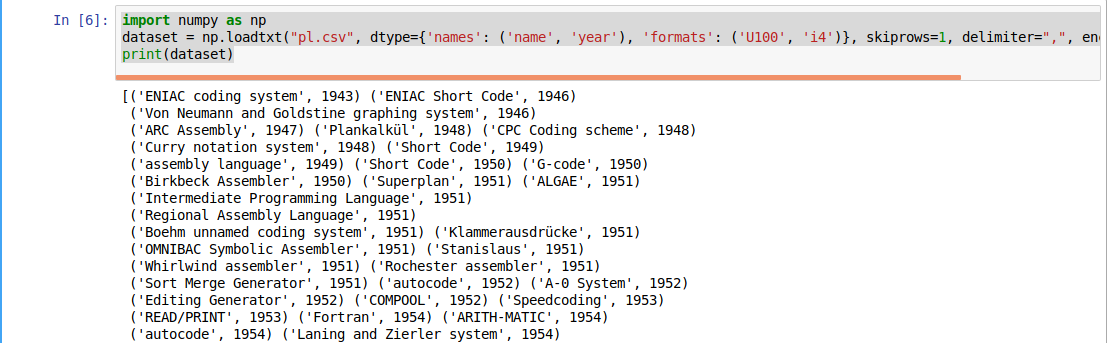

[Soutien du CSV en numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)
(**Ref:**
(https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html))
est différent du défaut de Python [CSV
reader](https://docs.python.org/3.9/library/csv.html) (**Ref:**
(https://docs.python.org/3.9/library/csv.html))
en raison de sa capacité à prendre en charge les [types de données](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html)
(**Ref:**
(https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html)).
Avant de continuer, examinez en profondeur
[numpy.loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)
(**Ref:**
(https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)).

  

Copier le fichier
[pl.tsv](../../data/pl.tsv) dans votre répertoire de travail actuel et utilisez le code suivant pour analyser le fichier TSV.



In [5]:
import numpy as np

dataset = np.loadtxt(
    "../../data/pl.tsv",  # Remplacez cette valeur par le chemin d'accès de votre fichier TSV.
    dtype={"names": ("name", "year"), "formats": ("U100", "i4")},
    skiprows=1,
    delimiter="\t",  # le séparateur est '\t' puisqu'il s'agit d'un fichier TSV.
    encoding="UTF-8",
)
print(dataset)

[('ENIAC coding system', 1943) ('ENIAC Short Code', 1946)
 ('Von Neumann and Goldstine graphing system', 1946)
 ('ARC Assembly', 1947) ('Plankalkül', 1948) ('CPC Coding scheme', 1948)
 ('Curry notation system', 1948) ('Short Code', 1949)
 ('assembly language', 1949) ('Short Code', 1950)
 ('Birkbeck Assembler', 1950) ('G-code', 1950) ('Superplan', 1951)
 ('ALGAE', 1951) ('Intermediate Programming Language', 1951)
 ('Regional Assembly Language', 1951)
 ('Boehm unnamed coding system', 1951) ('Klammerausdrücke', 1951)
 ('OMNIBAC Symbolic Assembler', 1951) ('Stanislaus', 1951)
 ('Whirlwind assembler', 1951) ('Rochester assembler', 1951)
 ('Sort Merge Generator', 1951) ('Editing Generator', 1952)
 ('COMPOOL', 1952) ('autocode', 1952) ('A-0 System', 1952)
 ('READ/PRINT', 1953) ('Speedcoding', 1953) ('Fortran', 1954)
 ('MATRIX MATH', 1954) ('autocode', 1954) ('ARITH-MATIC', 1954)
 ('Laning and Zierler system', 1954) ('MATH-MATIC', 1954)
 ('FLOW-MATIC', 1955) ('BACAIC', 1955) ('Freiburger Code'

Les changements dans le code ci-dessus par rapport au précédent. Un fichier TSV est un fichier séparé par des tabulations, c'est-à-dire que les valeurs des colonnes sont séparées par un
tabulation ((\t)).


- **`np.loadtxt`** : Cette fonction charge des données à partir d’un fichier texte, chaque ligne du fichier étant convertie en un élément d’un tableau NumPy.  
- **`"../data/pl.tsv"`** : Le chemin vers le fichier TSV. Vous devez le remplacer par le chemin réel où se trouve votre fichier TSV.  
- **`dtype={"names": ("name", "year"), "formats": ("U100", "i4")}`** : Spécifie le type de données du tableau NumPy résultant. Ici, `dtype` est défini comme un dictionnaire avec :  
  - `names` : Un tuple indiquant les noms des colonnes.  
  - `formats` : Un tuple indiquant le type de données de chaque colonne. `"U100"` représente une chaîne Unicode de longueur maximale 100, et `"i4"` représente un entier sur 4 octets.  
- **`skiprows=1`** : Ce paramètre permet d’ignorer la première ligne du fichier TSV, supposée être l’en-tête.  
- **`delimiter="\t"`** : Spécifie le délimiteur séparant les valeurs dans le fichier TSV. Ici, il s'agit d'une tabulation.  
- **`encoding="UTF-8"`** : Spécifie l’encodage du fichier. UTF-8 est un encodage couramment utilisé pour les fichiers texte.

Pour compter le nombre de lignes dans votre jeu de données, vous pouvez utiliser `len()`.

In [6]:
print(len(dataset))

100


Vous pouvez également afficher la sortie des variables et méthodes dans un Notebook sans `print()`

In [7]:
len(dataset)

100

### Explorer l'accès aux données colonne par colonne  

Extraire et afficher uniquement la colonne `"name"` du jeu de données.

In [8]:
dataset["name"]

array(['ENIAC coding system', 'ENIAC Short Code',
       'Von Neumann and Goldstine graphing system', 'ARC Assembly',
       'Plankalkül', 'CPC Coding scheme', 'Curry notation system',
       'Short Code', 'assembly language', 'Short Code',
       'Birkbeck Assembler', 'G-code', 'Superplan', 'ALGAE',
       'Intermediate Programming Language', 'Regional Assembly Language',
       'Boehm unnamed coding system', 'Klammerausdrücke',
       'OMNIBAC Symbolic Assembler', 'Stanislaus', 'Whirlwind assembler',
       'Rochester assembler', 'Sort Merge Generator', 'Editing Generator',
       'COMPOOL', 'autocode', 'A-0 System', 'READ/PRINT', 'Speedcoding',
       'Fortran', 'MATRIX MATH', 'autocode', 'ARITH-MATIC',
       'Laning and Zierler system', 'MATH-MATIC', 'FLOW-MATIC', 'BACAIC',
       'Freiburger Code', 'Sequentielle Formelübersetzung',
       'Internal Translator', 'PRINT', 'PACT',
       'Information Processing Language', 'FORTRAN for the IBM 704',
       'Fortran', 'UNICODE', 'COMT

Extraire et afficher uniquement la colonne `"year"` du jeu de données.

In [9]:
dataset["year"]

array([1943, 1946, 1946, 1947, 1948, 1948, 1948, 1949, 1949, 1950, 1950,
       1950, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951,
       1951, 1952, 1952, 1952, 1952, 1953, 1953, 1954, 1954, 1954, 1954,
       1954, 1954, 1955, 1955, 1955, 1955, 1955, 1955, 1955, 1956, 1956,
       1957, 1957, 1957, 1957, 1958, 1958, 1958, 1958, 1958, 1959, 1959,
       1959, 1959, 1959, 1959, 1960, 1960, 1960, 1960, 1961, 1962, 1962,
       1962, 1962, 1962, 1963, 1963, 1964, 1964, 1964, 1964, 1964, 1964,
       1964, 1964, 1964, 1965, 1965, 1965, 1966, 1966, 1966, 1966, 1966,
       1966, 1966, 1966, 1966, 1967, 1967, 1967, 1967, 1967, 1967, 1967,
       1968], dtype=int32)

### Filtrer les données par année

Trouvez et affichez toutes les lignes où l'année est supérieure à 1960.

In [10]:
filtered_data = dataset[dataset["year"] > 1960]
filtered_data

array([('FORTRAN IV', 1961), ('SNOBOL', 1962), ('TECO', 1962),
       ('Simula', 1962), ('APL', 1962), ('CORC', 1962), ('CPL', 1963),
       ('JOSS', 1963), ('P′′', 1964), ('Report Program Generator', 1964),
       ('TRAC', 1964), ('BASIC', 1964), ('COWSEL', 1964), ('PL/I', 1964),
       ('MARK IV', 1964), ('MIMIC', 1964), ('Speakeasy', 1964),
       ('IBM RPG II', 1965), ('Atlas Autocode', 1965), ('TELCOMP', 1965),
       ('Euler', 1966), ('ISWIM', 1966), ('ALGOL W', 1966),
       ('JOSS', 1966),
       ('Massachusetts General Hospital Utility Multi-Programming System', 1966),
       ('BCPL', 1966), ('Coral 66', 1966), ('FORTRAN 66', 1966),
       ('APL', 1966), ('Hop', 1967),
       ('Massachusetts General Hospital Utility Multi-Programming System', 1967),
       ('Space Programming Language', 1967), ('BCPL', 1967),
       ('Interlisp', 1967), ('Simula', 1967), ('XPL', 1967),
       ('PILOT', 1968)], dtype=[('name', '<U100'), ('year', '<i4')])

### Gérer les données manquantes ou incorrectes

Vérifiez le code suivant qui contient certaines valeurs manquantes.

In [11]:
# Enregistrez un fichier CSV modifié avec une valeur manquante (manuellement ou via script)
np.savetxt("pl_missing.csv", [("Simula", 1962), ("Swift", "")], delimiter=",", fmt="%s")

# Tentez de charger avec np.loadtxt (cela provoquera une erreur)
try:
    dataset_with_missing_values = np.loadtxt("pl_missing.csv", dtype={"names": ("name", "year"), "formats": ("U100", "i4")}, delimiter=",")
except ValueError as e:
    print("Erreur :", e)


Erreur : could not convert string '' to int32 at row 1, column 2.


In [12]:
# Charger avec np.genfromtxt (gère les valeurs manquantes)
dataset_with_missing_values = np.genfromtxt("pl_missing.csv", {"names": ("name", "year"), "formats": ("U100", "i4")}, delimiter=",", encoding="UTF-8")
dataset_with_missing_values

array([('Simula', 1962), ('Swift',   -1)],
      dtype=[('name', '<U100'), ('year', '<i4')])

Utiliser `filling_values` pour une colonne spécifique

In [13]:
# Charger le jeu de données avec des valeurs par défaut pour les entrées manquantes
dataset_with_missing_values = np.genfromtxt(
    "pl_missing.csv",
    dtype=[("name", "U100"), ("year", "i4")],
    delimiter=",",
    names=True,  # La première ligne contient les noms des colonnes
    encoding="UTF-8",
    missing_values="",  # Traiter les valeurs vides comme manquantes
    filling_values={"year": 0}  # Remplacer les années manquantes par 0
)

dataset_with_missing_values


array(('Swift', -1), dtype=[('Simula', '<U100'), ('1962', '<i4')])

`np.loadtxt()` générera une erreur en raison des valeurs manquantes. `np.genfromtxt()` chargera le jeu de données, en remplaçant les valeurs manquantes par `nan` ou une valeur par défaut.

In [14]:
### Convertir les données en DataFrame Pandas
df = pd.read_csv('../../data/pl.csv')

df

languageLabel  year
0                         ENIAC coding system  1943
1                            ENIAC Short Code  1946
2   Von Neumann and Goldstine graphing system  1946
3                                ARC Assembly  1947
4                                  Plankalkül  1948
..                                        ...   ...
95                                       BCPL  1967
96                                     Simula  1967
97                 Space Programming Language  1967
98                                      PILOT  1968
99                                   ALGOL 68  1968

[100 rows x 2 columns]

In [15]:
import pandas as pd

# Convertir le tableau structuré NumPy en DataFrame Pandas
df = pd.DataFrame(dataset)

# Afficher le DataFrame
df


name  year
0                         ENIAC coding system  1943
1                            ENIAC Short Code  1946
2   Von Neumann and Goldstine graphing system  1946
3                                ARC Assembly  1947
4                                  Plankalkül  1948
..                                        ...   ...
95                                       BCPL  1967
96                                  Interlisp  1967
97                                     Simula  1967
98                                        XPL  1967
99                                      PILOT  1968

[100 rows x 2 columns]

**Question** : Quelle est la différence entre `np.loadtxt()` et `np.genfromtxt()` lors de la lecture de fichiers CSV ? Quand faut-il privilégier l'un par rapport à l'autre ?

`np.loadtxt()` est plus rapide mais ne gère pas les valeurs manquantes, et il nécessite des fichiers bien formatés. `np.genfromtxt()` est plus flexible, supporte les valeurs manquantes (les remplaçant par nan par défaut) et permet de spécifier des types de données hétérogènes. Utilisez `np.loadtxt()` pour des fichiers bien structurés et homogènes en type, et `np.genfromtxt()` pour des fichiers avec des données manquantes ou des types variés.

## Exercice 3 ★★

La plupart des sources de données externes peuvent fournir leurs données au format JSON.
Notre prochain exercice consiste à analyser les fichiers JSON. Copiez le fichier
[pl.json](../../data/pl.json) à votre répertoire de travail actuel et utilisez le code suivant pour analyser le fichier JSON. Dans cet exercice, nous utilisons [Pandas python
package](https://pandas.pydata.org/pandas-docs/stable/) (**Ref:**
(https://pandas.pydata.org/pandas-docs/stable/)) d'analyser le fichier JSON pour obtenir un [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)
(**Ref:**
(https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)).
Essayez d'utiliser des méthodes comme
[transpose](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transpose.html#pandas.DataFrame.transpose)
(**Ref:**
(https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transpose.html#pandas.DataFrame.transpose)),
[count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html#pandas.DataFrame.count)
(**Ref:**
(https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html#pandas.DataFrame.count))
etc.

Avant de continuer cet exercice, veuillez vous entraîner à travailler avec des pandas.
Consultez [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
(**Ref:** (https://pandas.pydata.org/pandas-docs/stable/10min.html)).



In [16]:
from pandas import json_normalize
import pandas as pd
import json

# Charger les données JSON à partir d'un fichier
data = json.load(open("../../data/pl.json"))

# Convertir les données JSON en un DataFrame pandas
dataframe = json_normalize(data)

print(dataframe)


                                languageLabel  year
0                         ENIAC coding system  1943
1                            ENIAC Short Code  1946
2   Von Neumann and Goldstine graphing system  1946
3                                ARC Assembly  1947
4                                 PlankalkÃ¼l  1948
..                                        ...   ...
95                                       BCPL  1967
96                                  Interlisp  1967
97                                     Simula  1967
98                                        XPL  1967
99                                      PILOT  1968

[100 rows x 2 columns]


Ce code utilise la bibliothèque pandas de Python pour travailler avec des données JSON.

*. **Imports** :  
   - `from pandas import json_normalize` : Importe la fonction `json_normalize` de la bibliothèque pandas. Cette fonction est utilisée pour aplatir les données JSON en un DataFrame.  
   - `import pandas as pd` : Importe la bibliothèque pandas avec l'alias `pd`, qui est une convention courante.  
   - `import json` : Importe le module intégré `json` de Python pour manipuler les données JSON.

*. **Chargement des données JSON** :  
   - `data = json.load(open("../data/pl.json"))` : Ouvre un fichier JSON situé à `"../data/pl.json"` et charge son contenu dans la variable `data`. La fonction `json.load()` lit le fichier JSON et le transforme en un dictionnaire Python.

*. **Normalisation du JSON en DataFrame** :  
   - `dataframe = json_normalize(data)` : Utilise la fonction `json_normalize()` de pandas pour convertir les données JSON imbriquées (`data`) en une structure plate de type tableau, appelée DataFrame. Cette étape est particulièrement utile pour analyser des données JSON structurées où des objets ou tableaux imbriqués doivent être représentés sous forme tabulaire.

Et l'affichage sans `print()`

In [17]:
dataframe

languageLabel  year
0                         ENIAC coding system  1943
1                            ENIAC Short Code  1946
2   Von Neumann and Goldstine graphing system  1946
3                                ARC Assembly  1947
4                                 PlankalkÃ¼l  1948
..                                        ...   ...
95                                       BCPL  1967
96                                  Interlisp  1967
97                                     Simula  1967
98                                        XPL  1967
99                                      PILOT  1968

[100 rows x 2 columns]

Pour afficher les valeurs de la colonne **year**:

In [18]:
dataframe["year"]

0     1943
1     1946
2     1946
3     1947
4     1948
      ... 
95    1967
96    1967
97    1967
98    1967
99    1968
Name: year, Length: 100, dtype: object

Pour afficher les valeurs de la colonne **languageLabel**:

In [19]:
dataframe["languageLabel"]

0                           ENIAC coding system
1                              ENIAC Short Code
2     Von Neumann and Goldstine graphing system
3                                  ARC Assembly
4                                   PlankalkÃ¼l
                        ...                    
95                                         BCPL
96                                    Interlisp
97                                       Simula
98                                          XPL
99                                        PILOT
Name: languageLabel, Length: 100, dtype: object

Obtenir des informations importantes comme le nombre, le minimum, le maximum en utilisant `describe()`

In [20]:
dataframe.describe()

languageLabel  year
count            100   100
unique            88    24
top            COBOL  1951
freq               3    11

La méthode `dataframe.describe()` de pandas génère des statistiques descriptives qui résument la tendance centrale, la dispersion et la forme de la distribution d'un jeu de données. Voici ce que chaque partie inclut généralement :

1. **Count** : Nombre d'observations non-nulles (lignes) dans chaque colonne.
   
2. **Mean** : Valeur moyenne de chaque colonne numérique.

3. **Std (Écart-type)** : Mesure de la dispersion ou de l'étendue des valeurs dans chaque colonne numérique.

4. **Min** : La plus petite valeur dans chaque colonne numérique.

5. **25% (Percentile)** : La valeur en dessous de laquelle 25% des observations tombent (1er quartile).

6. **50% (Médiane)** : La médiane ou le 50e percentile.

7. **75% (Percentile)** : La valeur en dessous de laquelle 75% des observations tombent (3e quartile).

8. **Max** : La plus grande valeur dans chaque colonne numérique.

Lorsque vous appelez `describe()` sur un DataFrame pandas (`dataframe` dans ce cas), il analyse uniquement les colonnes numériques par défaut et fournit le résumé statistique pour chacune de ces colonnes. Les colonnes non numériques sont ignorées, sauf si elles sont spécifiquement incluses en utilisant des paramètres supplémentaires.

Cette méthode est utile pour obtenir rapidement un aperçu des valeurs numériques de votre jeu de données, identifier les valeurs aberrantes, comprendre la distribution de vos données, etc.

Pour obtenir les valeurs uniques de la colonne **year** :

In [21]:
dataframe["year"].unique()

array(['1943', '1946', '1947', '1948', '1949', '1950', '1951', '1952',
       '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960',
       '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968'],
      dtype=object)

Pour obtenir les valeurs uniques de la colonne **languageLabel** :

In [22]:
dataframe["languageLabel"].unique()

array(['ENIAC coding system', 'ENIAC Short Code',
       'Von Neumann and Goldstine graphing system', 'ARC Assembly',
       'PlankalkÃ¼l', 'CPC Coding scheme', 'Curry notation system',
       'Short Code', 'assembly language', 'Birkbeck Assembler', 'G-code',
       'Superplan', 'ALGAE', 'Intermediate Programming Language',
       'Regional Assembly Language', 'Boehm unnamed coding system',
       'KlammerausdrÃ¼cke', 'OMNIBAC Symbolic Assembler', 'Stanislaus',
       'Whirlwind assembler', 'Rochester assembler',
       'Sort Merge Generator', 'Editing Generator', 'COMPOOL', 'autocode',
       'A-0 System', 'READ/PRINT', 'Speedcoding', 'Fortran',
       'MATRIX MATH', 'ARITH-MATIC', 'Laning and Zierler system',
       'MATH-MATIC', 'FLOW-MATIC', 'BACAIC', 'Freiburger Code',
       'Sequentielle FormelÃ¼bersetzung', 'Internal Translator', 'PRINT',
       'PACT', 'Information Processing Language',
       'FORTRAN for the IBM 704', 'UNICODE', 'COMTRAN', 'GEORGE',
       'ALGOL 58', 'Lisp'

Pour trier les valeurs par une ou plusieurs colonnes

In [23]:
dataframe.sort_values(["year"])

languageLabel  year
0                                 ENIAC coding system  1943
1                                    ENIAC Short Code  1946
2           Von Neumann and Goldstine graphing system  1946
3                                        ARC Assembly  1947
4                                         PlankalkÃ¼l  1948
..                                                ...   ...
98                                                XPL  1967
93  Massachusetts General Hospital Utility Multi-P...  1967
92                                                Hop  1967
94                         Space Programming Language  1967
99                                              PILOT  1968

[100 rows x 2 columns]

In [24]:
dataframe.sort_values(["year", "languageLabel"])

languageLabel  year
0                                 ENIAC coding system  1943
1                                    ENIAC Short Code  1946
2           Von Neumann and Goldstine graphing system  1946
3                                        ARC Assembly  1947
5                                   CPC Coding scheme  1948
..                                                ...   ...
93  Massachusetts General Hospital Utility Multi-P...  1967
97                                             Simula  1967
94                         Space Programming Language  1967
98                                                XPL  1967
99                                              PILOT  1968

[100 rows x 2 columns]

In [25]:
dataframe.sort_values(["languageLabel"])

languageLabel  year
26           A-0 System  1952
62                ALCOR  1960
13                ALGAE  1951
52                ALGOL  1958
48             ALGOL 58  1958
..                  ...   ...
20  Whirlwind assembler  1951
98                  XPL  1967
8     assembly language  1949
31             autocode  1954
25             autocode  1952

[100 rows x 2 columns]

Pour obtenir les types de données des colonnes

In [26]:
dataframe.dtypes

languageLabel    object
year             object
dtype: object

L'attribut `dataframe.dtypes` dans pandas retourne les types de données de chaque colonne dans le DataFrame `dataframe`. Il fournit des informations sur la manière dont pandas a interprété les données provenant du JSON (ou de toute autre source) lors de sa lecture initiale et de son processus de normalisation. Voici ce que vous verrez généralement :

- **Types numériques** : Entiers (`int64`), nombres à virgule flottante (`float64`).
- **Type Objet** : Typiquement des chaînes de caractères (`object`), mais peut également inclure d'autres objets Python.
- **Types Date/Heure** : Si applicable, pandas reconnaîtra et étiquettera les données de date/heure de manière appropriée (`datetime64`).
- **Types Catégoriels** : Si pandas identifie une colonne avec un petit nombre de valeurs uniques, il peut lui attribuer un type `category`, ce qui peut optimiser l'utilisation de la mémoire et accélérer certaines opérations.

### Gestion des valeurs manquantes
- Identifier les valeurs manquantes dans le jeu de données.
- Remplacer les valeurs manquantes dans la colonne "year" par l'année médiane.
- Remplacer les valeurs manquantes dans les colonnes catégorielles (par exemple, "languageLabel") par "Inconnu".

In [27]:
dataframe["year"] = pd.to_numeric(dataframe["year"], errors="coerce")

# Identifier les valeurs manquantes
print(dataframe.isnull().sum())

# Remplacer les valeurs manquantes dans "year" par la valeur médiane
dataframe["year"].fillna(dataframe["year"].median(), inplace=True)
# Remplacer les valeurs manquantes dans "languageLabel" par "Inconnu"
dataframe["languageLabel"].fillna("Inconnu", inplace=True)


languageLabel    0
year             0
dtype: int64


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3112\1650476549.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe["year"].fillna(dataframe["year"].median(), inplace=True)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3112\1650476549.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

### Filtrage des données

- Extraire toutes les lignes où "year" est supérieur à 1960.
- Extraire toutes les lignes où "languageLabel" est "BCPL".

In [28]:
dataframe = dataframe.astype(dtype={"year": "<i4", "languageLabel": "<U200"})

In [29]:
# Filtrer les lignes où "year" est supérieur à 1960
filtered_year = dataframe[dataframe["year"] > 1960]
filtered_year


languageLabel  year
63                                         FORTRAN IV  1961
64                                             SNOBOL  1962
65                                               TECO  1962
66                                             Simula  1962
67                                                APL  1962
68                                               CORC  1962
69                                                CPL  1963
70                                               JOSS  1963
71                                            Pâ€²â€²  1964
72                           Report Program Generator  1964
73                                               TRAC  1964
74                                              BASIC  1964
75                                             COWSEL  1964
76                                               PL/I  1964
77                                            MARK IV  1964
78                                              MIMIC  1964
79                                          Speakeasy  1964
80                                         IBM RPG II  1965
81                                     Atlas Autocode  1965
82                                            TELCOMP  1965
83                                              Euler  1966
84                                              ISWIM  1966
85                                            ALGOL W  1966
86                                               JOSS  1966
87  Massachusetts General Hospital Utility Multi-P...  1966
88                                               BCPL  1966
89                                           Coral 66  1966
90                                         FORTRAN 66  1966
91                                                APL  1966
92                                                Hop  1967
93  Massachusetts General Hospital Utility Multi-P...  1967
94                         Space Programming Language  1967
95                                               BCPL  1967
96                                          Interlisp  1967
97                                             Simula  1967
98                                                XPL  1967
99                                              PILOT  1968

In [30]:
# Filtrer les lignes où "languageLabel" est "BCPL"
filtered_language = dataframe[dataframe["languageLabel"] == "BCPL"]
print(filtered_language)


   languageLabel  year
88          BCPL  1966
95          BCPL  1967


### Groupement et agrégation
- Compter combien d'entrées existent par "languageLabel".
- Compter combien d'entrées existent par "year".

In [31]:

# Compter combien d'entrées existent par "languageLabel"
language_label_counts = dataframe["languageLabel"].value_counts()

# Compter combien d'entrées existent par "year"
year_counts = dataframe["year"].value_counts()


### Exportation des données

Sauvegarder le DataFrame modifié dans un nouveau fichier JSON.

In [32]:
# Sauvegarder dans un fichier JSON
dataframe.to_json("modified_pl.json", orient="records", indent=4)


Enregistrez-le également sous forme de fichier CSV.

In [33]:
# Enregistrer dans un fichier CSV
dataframe.to_csv("modified_pl.csv", index=False)


**Question :** Quelle est la différence entre `json.load()` et `json.loads()` en Python ?

La différence principale est que :

-json.load() lit un objet JSON directement depuis un fichier ouvert (file object).<br>
-json.loads() lit un objet JSON depuis une chaîne de caractères (str).

Utilisez json.load() pour charger un JSON depuis un fichier et json.loads() pour traiter un JSON sous forme de texte.

## Exercice 4 ★★

Dans cet exercice, nous examinerons comment télécharger des données à partir
des sources de données externes utilisant des interfaces d'interrogation spéciales. Par exemple, les données ci-dessus ont été obtenues à partir de [Wikidata query](https://query.wikidata.org/) 

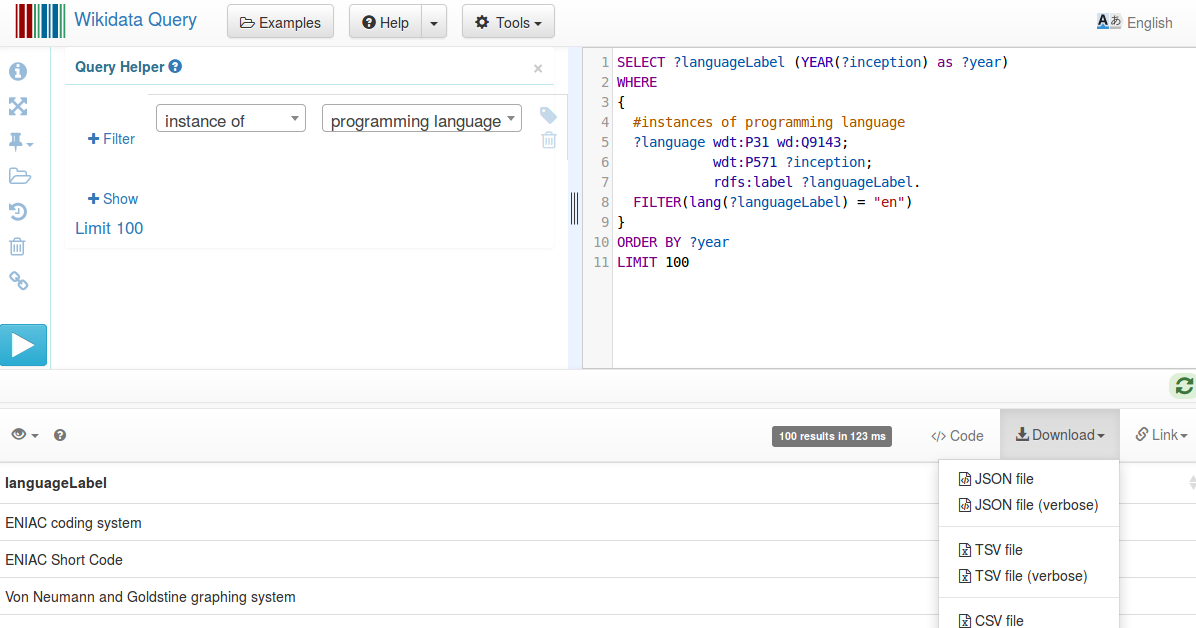

Vous trouverez ci-dessous le code permettant de lire les données provenant d'une source externe. Utilisez ce
[url](https://query.wikidata.org/sparql?query=SELECT%20%3FlanguageLabel%20(YEAR(%3Finception)%20as%20%3Fyear)%0AWHERE%0A%7B%0A%20%20%23instances%20of%20programming%20language%0A%20%20%3Flanguage%20wdt%3AP31%20wd%3AQ9143%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP571%20%3Finception%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20rdfs%3Alabel%20%3FlanguageLabel.%0A%20%20FILTER(lang(%3FlanguageLabel)%20%3D%20%22en%22)%0A%7D%0AORDER%20BY%20%3Fyear%0ALIMIT%20100&format=json):
(https://query.wikidata.org/sparql?query=SELECT%20%3FlanguageLabel%20(YEAR(%3Finception)%20as%20%3Fyear)%0AWHERE%0A%7B%0A%20%20%23instances%20of%20programming%20language%0A%20%20%3Flanguage%20wdt%3AP31%20wd%3AQ9143%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP571%20%3Finception%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20rdfs%3Alabel%20%3FlanguageLabel.%0A%20%20FILTER(lang(%3FlanguageLabel)%20%3D%20%22en%22)%0A%7D%0AORDER%20BY%20%3Fyear%0ALIMIT%20100&format=json).



In [34]:
import urllib.request
import json
import pandas as pd

url = "https://query.wikidata.org/sparql?query=SELECT%20%3FlanguageLabel%20(YEAR(%3Finception)%20as%20%3Fyear)%0AWHERE%0A%7B%0A%20%20%23instances%20of%20programming%20language%0A%20%20%3Flanguage%20wdt%3AP31%20wd%3AQ9143%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20wdt%3AP571%20%3Finception%3B%0A%20%20%20%20%20%20%20%20%20%20%20%20rdfs%3Alabel%20%3FlanguageLabel.%0A%20%20FILTER(lang(%3FlanguageLabel)%20%3D%20%22en%22)%0A%7D%0AORDER%20BY%20%3Fyear%0ALIMIT%20100&format=json"
response = urllib.request.urlopen(url)
responsedata = json.loads(response.read().decode("utf-8"))

array = []

for data in responsedata["results"]["bindings"]:
    array.append([data["year"]["value"], data["languageLabel"]["value"]])

dataframe = pd.DataFrame(array, columns=["year", "languageLabel"])
dataframe = dataframe.astype(dtype={"year": "<i4", "languageLabel": "<U200"})
print(dataframe)

    year                              languageLabel
0   1942                                 Plankalkül
1   1943                        ENIAC coding system
2   1946                           ENIAC Short Code
3   1946  Von Neumann and Goldstine graphing system
4   1948                          CPC Coding scheme
..   ...                                        ...
95  1967                                       Logo
96  1967                 Space Programming Language
97  1968                                      Refal
98  1968                                     MAPPER
99  1968                                      FOCAL

[100 rows x 2 columns]


In [35]:
dataframe

year                              languageLabel
0   1942                                 Plankalkül
1   1943                        ENIAC coding system
2   1946                           ENIAC Short Code
3   1946  Von Neumann and Goldstine graphing system
4   1948                          CPC Coding scheme
..   ...                                        ...
95  1967                                       Logo
96  1967                 Space Programming Language
97  1968                                      Refal
98  1968                                     MAPPER
99  1968                                      FOCAL

[100 rows x 2 columns]

In [36]:
dataframe["year"].describe()

count     100.000000
mean     1958.310000
std         6.500497
min      1942.000000
25%      1952.750000
50%      1959.000000
75%      1964.000000
max      1968.000000
Name: year, dtype: float64

In [37]:
dataframe["languageLabel"].describe()

count          100
unique          99
top       autocode
freq             2
Name: languageLabel, dtype: object

In [38]:
dataframe.dtypes

year              int32
languageLabel    object
dtype: object

### Filtrer les données pour une période spécifique

Vous pouvez filtrer les données pour obtenir les langages de programmation inventés dans une plage d'années spécifique (par exemple, entre 1980 et 2000). Cela peut être utile si vous êtes uniquement intéressé par les langages créés pendant une période donnée.


In [39]:
# Filtrer le DataFrame pour les langages créés entre 1980 et 2000
filtered_df = dataframe[(dataframe["year"] >= 1980) & (dataframe["year"] <= 2000)]

# Afficher les données filtrées
print(filtered_df)

Empty DataFrame
Columns: [year, languageLabel]
Index: []


### Compter les langages par année 

Une opération utile pourrait être de compter combien de langages ont été inventés chaque année. Cela peut vous donner une meilleure compréhension des tendances dans la création des langages de programmation.

In [40]:
# Compter le nombre de langages créés par an
languages_per_year = dataframe.groupby("year").size()

# Afficher le résultat
print(languages_per_year)


year
1942     1
1943     1
1946     2
1948     2
1949     1
1950     3
1951    11
1952     4
1953     2
1954     4
1955     8
1956     1
1957     6
1958     1
1959     5
1960     7
1961     1
1962     5
1963     3
1964    11
1965     5
1966     7
1967     6
1968     3
dtype: int64


### Identifier les langages ayant la date de création la plus récente

Une autre question intéressante à poser pourrait être de savoir quel langage a la date de création la plus récente. Nous pouvons trier le DataFrame par année et trouver les dernières entrées.

In [41]:
# Trier le DataFrame par année et obtenir les 10 langages les plus récents
recent_languages = dataframe.sort_values("year", ascending=False).head(10)

# Afficher les 10 langages les plus récents
print(recent_languages)


    year               languageLabel
99  1968                       FOCAL
97  1968                       Refal
98  1968                      MAPPER
92  1967                        BCPL
91  1967                         XPL
94  1967                       ABSYS
93  1967                   Interlisp
95  1967                        Logo
96  1967  Space Programming Language
90  1966                       PL360


**Question**

Quelle est la tendance du nombre de langages de programmation créés au fil du temps ?

Pour répondre à cette question, nous devons filtrer les données pour les langages créés entre 1960 et 2000, puis identifier l'année où le plus grand nombre de langages de programmation a été créé. Ensuite, nous allons créer un nouveau DataFrame contenant les 5 langages de programmation les plus populaires (par nombre d'occurrences) pendant cette période.

In [42]:
filtered_df = dataframe[(dataframe["year"] >= 1960) & (dataframe["year"] <= 2000)]
languages_per_year = filtered_df.groupby("year").size().sort_values(ascending=False).head(1)
max_year = languages_per_year.index[0]

print(f"L'année avec le plus grand nombre de langages créés est {max_year}.")

###==========================================###
filtered_lang = filtered_df.groupby("languageLabel").size().sort_values(ascending=False).head(5)
top_5_langages = filtered_lang

print("\nLes 5 langages de programmation les plus populaires entre 1960 et 2000 sont :")
print(top_5_langages)

L'année avec le plus grand nombre de langages créés est 1964.

Les 5 langages de programmation les plus populaires entre 1960 et 2000 sont :
languageLabel
ABSYS      1
ALCOR      1
ALGO       1
ALGOL W    1
ALTRAN     1
dtype: int64


## Exercice 5 ★★★

Ce exercice utilisera quelques analyses de données de base. Poursuivant avec le code de l'exercice 1.4, comptons le nombre de langages de programmation sortis en un an.

In [43]:
grouped = dataframe.groupby("year").count()
grouped

languageLabel
year               
1942              1
1943              1
1946              2
1948              2
1949              1
1950              3
1951             11
1952              4
1953              2
1954              4
1955              8
1956              1
1957              6
1958              1
1959              5
1960              7
1961              1
1962              5
1963              3
1964             11
1965              5
1966              7
1967              6
1968              3

Vous pouvez également utiliser plusieurs fonctions d'agrégation en utilisant agg()

In [44]:
grouped = dataframe.groupby("year").agg(["count"])
grouped

languageLabel
             count
year              
1942             1
1943             1
1946             2
1948             2
1949             1
1950             3
1951            11
1952             4
1953             2
1954             4
1955             8
1956             1
1957             6
1958             1
1959             5
1960             7
1961             1
1962             5
1963             3
1964            11
1965             5
1966             7
1967             6
1968             3

Jusqu'à présent, nous avons travaillé avec des tableaux à deux colonnes. Maintenant, nous nous concentrons sur des tableaux à trois colonnes (langage de programmation, année, paradigme). Copiez le fichier [plparadigm.json](../../data/plparadigm.json) dans votre répertoire de travail. Et testez le programme suivant.

In [45]:
from pandas import json_normalize
import pandas as pd
import json

# Charger les données JSON depuis un fichier
jsondata = json.load(open("../../data/plparadigm.json"))

# Créer une liste vide pour stocker les données temporaires
array = []

# Boucle à travers chaque élément des données JSON
for data in jsondata:
    # Extraire des valeurs spécifiques de chaque élément et les ajouter à la liste
    # En supposant que "year", "languageLabel" et "paradigmLabel" sont des clés dans les données JSON
    array.append([data["year"], data["languageLabel"], data["paradigmLabel"]])

# Créer un DataFrame pandas à partir de la liste avec des colonnes nommées
dataframe = pd.DataFrame(array, columns=["year", "languageLabel", "paradigmLabel"])

# Définir les types de données pour les colonnes du DataFrame
# Cela garantit un stockage efficace et évite les erreurs potentielles lors des opérations
dataframe = dataframe.astype(
    dtype={"year": "int64", "languageLabel": "<U200", "paradigmLabel": "<U200"}
)

# Regrouper le DataFrame par les colonnes "year" et "paradigmLabel"
grouped = dataframe


Testez maintenant le programme suivant. Comparez la différence de rendement.

In [46]:
grouped = dataframe.groupby(["paradigmLabel", "year"]).agg(["count"])
grouped

languageLabel
                                    count
paradigmLabel          year              
array programming      1954             1
                       1957             1
                       1962             1
                       1966             1
assembly language      1956             1
...                                   ...
structured programming 1957             1
                       1958             1
                       1962             1
                       1966             1
                       1970             1

[73 rows x 1 columns]

**Question 1**

Votre prochain objectif est de lancer la requête suivante pour obtenir la population
des informations sur les différents pays (limitées à 10000 lignes). Exécutez le
suite à la requête sur [Wikidata query service](https://query.wikidata.org)
et téléchargez le fichier JSON.


```
SELECT DISTINCT ?countryLabel (YEAR(?date) as ?year) ?population
WHERE {
 ?country wdt:P31 wd:Q6256; #Country 
   p:P1082 ?populationStatement;
  rdfs:label ?countryLabel. #Label
 ?populationStatement ps:P1082 ?population; #population
  pq:P585 ?date. #period in time
 FILTER(lang(?countryLabel)="en") #Label in English
}
ORDER by ?countryLabel ?year
LIMIT 1000
```

Maintenant, calculez et affichez les informations suivantes (en utilisant différentes
[opérations disponibles dans la bibliothèque des pandas] (https://pandas.pydata.org/pandas-docs/stable/10min.html)
(**Ref:**
(https://pandas.pydata.org/pandas-docs/stable/10min.html))):

1.  La population des pays dans l'ordre alphabétique de leur nom et
    par ordre croissant d'année.
2.  La dernière population disponible de chaque pays
3.  Le pays ayant la population la plus faible et la plus élevée (compte tenu de la
    population la plus récente)

In [47]:
from pandas import json_normalize
import pandas as pd
import json

# Charger les données JSON depuis un fichier
jsondata = json.load(open("../../data/Base1.json"))


# Créer une liste vide pour stocker les données temporaires
array = []

# Boucle à travers chaque élément des données JSON
for data in jsondata:
    # Extraire des valeurs spécifiques de chaque élément et les ajouter à la liste
    # En supposant que "year", "languageLabel" et "paradigmLabel" sont des clés dans les données JSON
    array.append([data["year"], data["countryLabel"], data["population"]])

# Créer un DataFrame pandas à partir de la liste avec des colonnes nommées
dataframe = pd.DataFrame(array, columns=["year", "countryLabel", "population"])

# Définir les types de données pour les colonnes du DataFrame
# Cela garantit un stockage efficace et évite les erreurs potentielles lors des opérations
dataframe = dataframe.astype(
    dtype={"year": "int64", "countryLabel": "<U200", "population": "int64"}
)

# Regrouper le DataFrame par les colonnes "year" et "paradigmLabel"
dataframe


year countryLabel  population
0    1960  Afghanistan     8774440
1    1961  Afghanistan     8953544
2    1962  Afghanistan     9141783
3    1963  Afghanistan     9339507
4    1964  Afghanistan     9547131
..    ...          ...         ...
995  1985     Botswana     1184657
996  1986     Botswana     1223738
997  1987     Botswana     1263269
998  1988     Botswana     1303192
999  1989     Botswana     1343440

[1000 rows x 3 columns]

**Question 2** :

Votre objectif suivant est d'exécuter la requête suivante pour obtenir des informations liées aux articles scientifiques publiés après 2010 (limité à 5000 lignes). Exécutez la requête suivante sur le [service de requêtes Wikidata](https://query-scholarly.wikidata.org/) et téléchargez le fichier JSON.

Cela vous fournira les informations suivantes concernant les articles scientifiques : titre, sujet principal et année de publication.

**Remarque** : Veuillez noter que l'URL pour interroger les articles scientifiques est [https://query-scholarly.wikidata.org/](https://query-scholarly.wikidata.org/).

```
SELECT ?title ?subject ?year
{
  ?article wdt:P31 wd:Q13442814; #scientific article
           wdt:P1476 ?title; #title of the article
           wdt:P921 ?subject; #main subject
           wdt:P577 ?date. #publication date
  BIND(YEAR(?date) as ?year).
  FILTER(lang(?title) = "en" && ?year>2010)
}
LIMIT 5000
```

Maintenant, calculez et affichez les informations suivantes (en utilisant diverses [opérations disponibles dans la bibliothèque des pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
(**Ref:**
(https://pandas.pydata.org/pandas-docs/stable/10min.html))):

1.  Le nombre d'articles publiés sur différents sujets chaque année.
2.  Principal sujet d'intérêt pour la communauté scientifique chaque année (sur la base
    sur les résultats de l'interrogation ci-dessus).
3.  Les 10 principaux sujets d'intérêt pour la communauté scientifique (sur la base
    les résultats de l'interrogation ci-dessus) depuis 2010.

**Indice**: Regardez les fonctions groupby, reset_index, head, tail, sort_values, count de Pandas



**Remarque**: Si vous obtenez des erreurs de dépassement de temps (time-out), veuillez modifier la LIMITE à des valeurs inférieures (1000, 2000, 5000).

In [48]:
from pandas import json_normalize
import pandas as pd
import json

# Charger les données JSON depuis un fichier
jsondata = json.load(open("../../data/Base2.json",encoding='utf-8'))


# Créer une liste vide pour stocker les données temporaires
array = []

# Boucle à travers chaque élément des données JSON
for data in jsondata:
    # Extraire des valeurs spécifiques de chaque élément et les ajouter à la liste
    # En supposant que "year", "languageLabel" et "paradigmLabel" sont des clés dans les données JSON
    array.append([data["year"], data["title"], data["subject"]])

# Créer un DataFrame pandas à partir de la liste avec des colonnes nommées
dataframe = pd.DataFrame(array, columns=["year", "title", "subject"])

# Définir les types de données pour les colonnes du DataFrame
# Cela garantit un stockage efficace et évite les erreurs potentielles lors des opérations
dataframe = dataframe.astype(
    dtype={"year": "int64", "title": "<U200", "subject": "<U200"}
)

# Regrouper le DataFrame par les colonnes "year" et "paradigmLabel"
dataframe

year                                              title  \
0     2017  From Molecules to Life: Quantifying the Comple...   
1     2016  Introduction to the Special Issue - Habitabili...   
2     2013  Life, the universe, and everything: an educati...   
3     2013  The Universe Within a Scientific Adventure Nei...   
4     2018    Astrovirology: Viruses at Large in the Universe   
...    ...                                                ...   
3995  2018  Armed conflict and child mortality in Africa: ...   
3996  2019  What could be influencing older Ghanaians outp...   
3997  2019  What could be influencing older Ghanaians outp...   
3998  2018  Primary Immunodeficiencies: Epidemiology in th...   
3999  2020  H3Africa partnerships to empower clinical rese...   

                                 subject  
0      http://www.wikidata.org/entity/Q1  
1      http://www.wikidata.org/entity/Q1  
2      http://www.wikidata.org/entity/Q1  
3      http://www.wikidata.org/entity/Q1  
4      http://www.wikidata.org/entity/Q1  
...                                  ...  
3995  http://www.wikidata.org/entity/Q15  
3996  http://www.wikidata.org/entity/Q15  
3997  http://www.wikidata.org/entity/Q15  
3998  http://www.wikidata.org/entity/Q15  
3999  http://www.wikidata.org/entity/Q15  

[4000 rows x 3 columns]

In [49]:
import pandas as pd

# Charger les données depuis le fichier JSON (en spécifiant l'encodage si nécessaire)
df = pd.read_json('../../data/Base2_1000.json', encoding='utf-8')

# Afficher les premières lignes pour inspecter la structure du fichier
print(df.head())

# 1. Le nombre d'articles publiés sur différents sujets chaque année
articles_par_annee_sujet = df.groupby(['year', 'subject']).size().reset_index(name='Nombre_articles')

print("\nLe nombre d'articles publiés chaque année sur différents sujets :")
print(articles_par_annee_sujet)

# 2. Principal sujet d'intérêt pour la communauté scientifique chaque année
# Pour cela, on groupe par année et on récupère le sujet ayant le plus grand nombre d'articles chaque année
principal_sujet_par_annee = articles_par_annee_sujet.loc[articles_par_annee_sujet.groupby('year')['Nombre_articles'].idxmax()]

print("\nLe principal sujet d'intérêt pour la communauté scientifique chaque année :")
print(principal_sujet_par_annee[['year', 'subject', 'Nombre_articles']])

# 3. Les 10 principaux sujets d'intérêt pour la communauté scientifique depuis 2010
# Nous filtrons d'abord les données pour les années à partir de 2010
df_2010_plus = df[df['year'] >= 2010]

# Grouper les données par sujet et sommer le nombre d'articles par sujet
sujets_2010_plus = df_2010_plus.groupby('subject').size().reset_index(name='Nombre_articles')

# Trier les sujets par nombre d'articles en ordre décroissant et sélectionner les 10 premiers
top_10_sujets_2010_plus = sujets_2010_plus.sort_values(by='Nombre_articles', ascending=False).head(10)

print("\nLes 10 principaux sujets d'intérêt pour la communauté scientifique depuis 2010 :")
print(top_10_sujets_2010_plus)


                                               title  \
0  Life, the universe, and everything: an educati...   
1  From Molecules to Life: Quantifying the Comple...   
2  Introduction to the Special Issue - Habitabili...   
3  The Universe Within a Scientific Adventure Nei...   
4    Astrovirology: Viruses at Large in the Universe   

                             subject  year  
0  http://www.wikidata.org/entity/Q1  2013  
1  http://www.wikidata.org/entity/Q1  2017  
2  http://www.wikidata.org/entity/Q1  2016  
3  http://www.wikidata.org/entity/Q1  2013  
4  http://www.wikidata.org/entity/Q1  2018  

Le nombre d'articles publiés chaque année sur différents sujets :
    year                            subject  Nombre_articles
0   2011  http://www.wikidata.org/entity/Q1               42
1   2011  http://www.wikidata.org/entity/Q2               67
2   2012  http://www.wikidata.org/entity/Q1               44
3   2012  http://www.wikidata.org/entity/Q2               43
4   2013  http://www.

## Exercice 6 ★★★

Dans notre dernier exercice, nous allons interroger Wikidata et obtenir les URL des images. Ensuite, nous téléchargerons ces images.

In [50]:
!pip install sparqlwrapper


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [116]:
import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

# Get cities
query = """SELECT DISTINCT ?grandeville ?grandevilleLabel ?pays ?paysLabel ?image {
?grandeville wdt:P31 wd:Q1549591;
                wdt:P17 ?pays;
                wdt:P18 ?image.
SERVICE wikibase:label { bd:serviceParam wikibase:language "fr". }
}
LIMIT 10"""

# Get cat
query = """SELECT DISTINCT ?chat ?chatLabel ?image {
?chat wdt:P31 wd:Q146;  # Q146 est l'identifiant pour "chat"
        wdt:P18 ?image.
SERVICE wikibase:label { bd:serviceParam wikibase:language "fr". }
}
LIMIT 10"""

# Get skyline
query = """SELECT DISTINCT ?gratte_ciel ?gratte_cielLabel ?pays ?paysLabel ?image ?hauteur WHERE {
?gratte_ciel wdt:P31 wd:Q11303;  # Q11303 est l'identifiant pour "gratte-ciel"
            wdt:P17 ?pays;        # Pays
            wdt:P18 ?image;       # Image
            wdt:P2048 ?hauteur.  # Hauteur
SERVICE wikibase:label { bd:serviceParam wikibase:language "fr". }
}
LIMIT 110"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (
        sys.version_info[0],
        sys.version_info[1],
    )
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


array = []
results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    array.append(
        (
            result["gratte_cielLabel"]["value"],
            result["paysLabel"]["value"],
            result["image"]["value"],
            result["hauteur"]["value"]
        )
    )

In [117]:
dataframe = pd.DataFrame(array, columns=["gratte_cielLabel", "paysLabel", "image", "hauteur"])
dataframe = dataframe.astype(
    dtype={"gratte_cielLabel": "<U200", "paysLabel": "<U200", "image": "<U200", "hauteur": "float32"}
)
dataframe["image"]

0     http://commons.wikimedia.org/wiki/Special:File...
1     http://commons.wikimedia.org/wiki/Special:File...
2     http://commons.wikimedia.org/wiki/Special:File...
3     http://commons.wikimedia.org/wiki/Special:File...
4     http://commons.wikimedia.org/wiki/Special:File...
                            ...                        
95    http://commons.wikimedia.org/wiki/Special:File...
96    http://commons.wikimedia.org/wiki/Special:File...
97    http://commons.wikimedia.org/wiki/Special:File...
98    http://commons.wikimedia.org/wiki/Special:File...
99    http://commons.wikimedia.org/wiki/Special:File...
Name: image, Length: 100, dtype: object

In [118]:
top_10 = dataframe.sort_values(by='hauteur', ascending=False).head(10)
top_10

gratte_cielLabel                      paysLabel  \
88                    X-Seed 4000                          Japon   
91          Empire State Building                     États-Unis   
96                 tours Petronas                       Malaisie   
89         One World Trade Center                     États-Unis   
99                      China Zun  république populaire de Chine   
43                    Pentominium            Émirats arabes unis   
17  International Commerce Center  république populaire de Chine   
21              Perle de l'Orient  république populaire de Chine   
92          Empire State Building                     États-Unis   
48                   Zifeng Tower  république populaire de Chine   

                                                image      hauteur  
88  http://commons.wikimedia.org/wiki/Special:File...  4000.000000  
91  http://commons.wikimedia.org/wiki/Special:File...  1500.000000  
96  http://commons.wikimedia.org/wiki/Special:File...  1483.000000  
89  http://commons.wikimedia.org/wiki/Special:File...   541.299988  
99  http://commons.wikimedia.org/wiki/Special:File...   528.000000  
43  http://commons.wikimedia.org/wiki/Special:File...   516.000000  
17  http://commons.wikimedia.org/wiki/Special:File...   484.000000  
21  http://commons.wikimedia.org/wiki/Special:File...   468.000000  
92  http://commons.wikimedia.org/wiki/Special:File...   453.000000  
48  http://commons.wikimedia.org/wiki/Special:File...   450.000000

Nous allons maintenant télécharger les images

In [119]:
import requests
import shutil
import os


def download_image(url):

    headers = {"User-Agent": "Mozilla/5.0"}
    request = requests.get(url, allow_redirects=True, headers=headers, stream=True)
    if request.status_code == 200:
        with open(os.path.basename(url), "wb") as image:
            request.raw.decode_content = True
            shutil.copyfileobj(request.raw, image)
    return request.status_code

In [120]:
dataframe.image.apply(download_image)

0     200
1     200
2     200
3     200
4     200
     ... 
95    200
96    200
97    200
98    200
99    200
Name: image, Length: 100, dtype: int64

**Question 1**: 

Modifiez le code ci-dessus et téléchargez des images liées au sujet de votre choix (villes, monuments historiques, fleurs, bâtiments, etc.).

**Question 2**

Votre objectif est de récupérer les données des gratte-ciel ([Q11303](https://www.wikidata.org/wiki/Q11303)) (nom, pays, image, hauteur) depuis Wikidata, puis de télécharger et filtrer les images en fonction de leur taille. Utilisez le code de traitement d'image ci-dessous pour classifier les gratte-ciel en fonction du contraste de leur skyline (images de jour vs. images de nuit).

Quel pays possède le plus grand nombre de gratte-ciel apparaissant sur des images de nuit ?

In [55]:
! pip install opencv-python


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [121]:
import cv2
import numpy as np

def classifier_jour_nuit(chemin_image):
    img = cv2.imread(chemin_image, cv2.IMREAD_GRAYSCALE)  # Conversion en niveaux de gris
    luminosité = np.mean(img)  # Calcul de la luminosité moyenne des pixels

    if luminosité < 60:  # Les images sombres sont considérées comme des images de nuit
        return "nuit"
    return "jour"

def lister_fichiers_jpg():
    # Répertoire courant
    dossier = "."

    # Liste pour stocker les noms des fichiers .jpg
    fichiers_jpg = []

    # Parcourir les fichiers dans le répertoire courant
    for fichier in os.listdir(dossier):
        # Vérifier si le fichier se termine par .jpg
        if fichier.lower().endswith('.jpg'):
            fichiers_jpg.append(fichier)

    return fichiers_jpg

# Exemple d'utilisation
fichiers = lister_fichiers_jpg()

jour = []
for fichier in fichiers:
    jour.append(classifier_jour_nuit(fichier))

dataframe["jour"] = jour
dataframe


ValueError: Length of values (94) does not match length of index (100)